In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r"D:\Kifya_training\Week 1\Technical  Content\Data\raw_analyst_ratings.csv")

# Convert 'date' column to datetime with format specification
data['date'] = pd.to_datetime(data['date'], format="%Y-%m-%d %H:%M:%S%z", errors='coerce')

# Extract date and time components
data['date_only'] = data['date'].dt.date
data['hour'] = data['date'].dt.hour

# Print first few rows to check results
print(data[['date', 'date_only', 'hour']].head())


                       date   date_only  hour
0 2020-06-05 10:30:54-04:00  2020-06-05  10.0
1 2020-06-03 10:45:20-04:00  2020-06-03  10.0
2 2020-05-26 04:30:07-04:00  2020-05-26   4.0
3 2020-05-22 12:45:06-04:00  2020-05-22  12.0
4 2020-05-22 11:38:59-04:00  2020-05-22  11.0


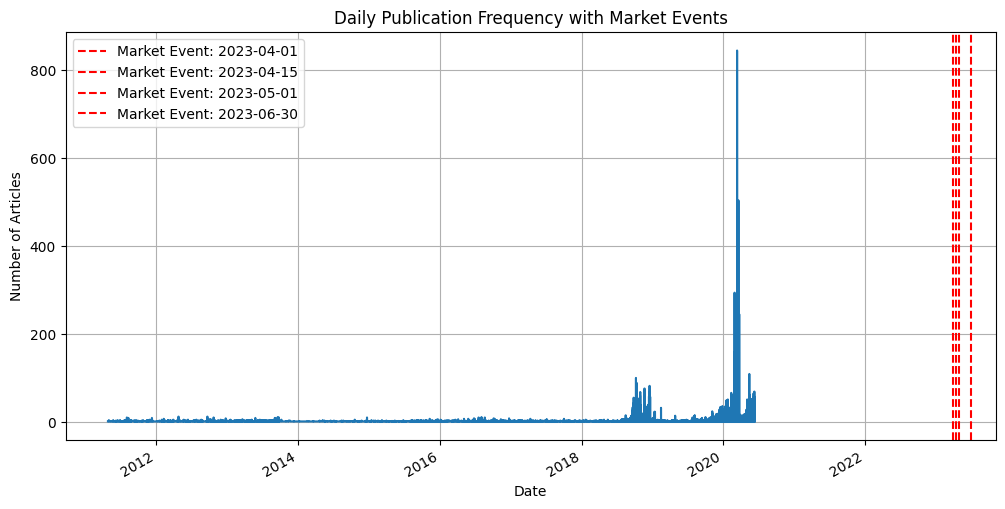

In [17]:
# Define a list of key market event dates (example dates, replace with your actual event dates)
market_events = ['2023-04-01', '2023-04-15', '2023-05-01', '2023-06-30']  # Replace with actual dates

# Convert the market events to datetime format
market_events = pd.to_datetime(market_events)

# Group by date to get daily publication frequency
daily_publication = data.groupby('date').size()

# Plot daily publication frequency
plt.figure(figsize=(12, 6))
daily_publication.plot()

# Highlight spikes related to market events
for event in market_events:
    plt.axvline(x=event, color='r', linestyle='--', label=f"Market Event: {event.date()}")

plt.title('Daily Publication Frequency with Market Events')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.grid()
plt.show()


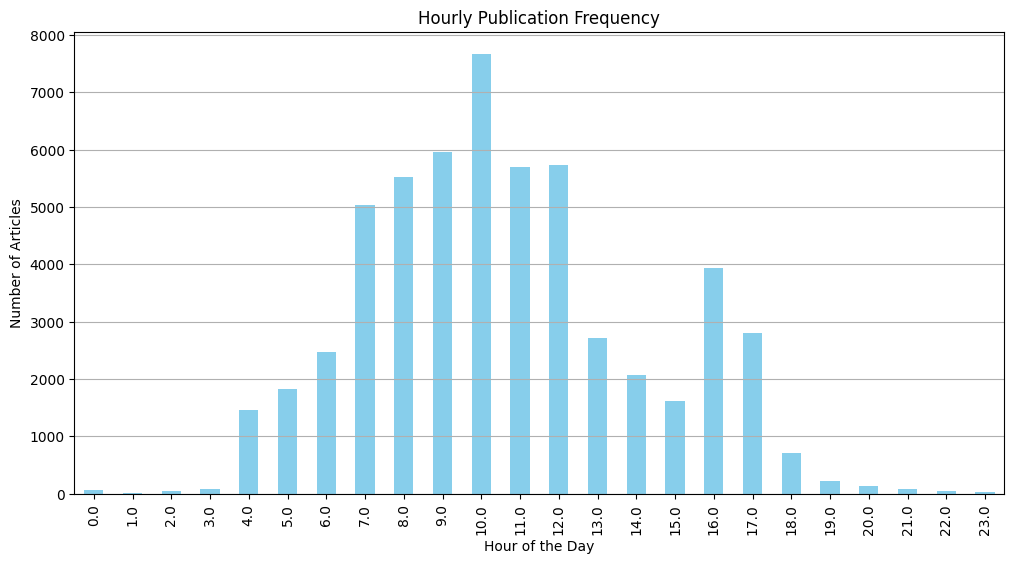

In [18]:
# Group by hour to get the number of articles published each hour
hourly_publication = data.groupby('hour').size()

# Plot hourly publication frequency
plt.figure(figsize=(12, 6))
hourly_publication.plot(kind='bar', color='skyblue')
plt.title('Hourly Publication Frequency')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.xticks(range(0, 24))  # Ensure all hours are displayed
plt.grid(axis='y')
plt.show()


                       date day_of_week  hour
0 2020-06-05 10:30:54-04:00      Friday  10.0
1 2020-06-03 10:45:20-04:00   Wednesday  10.0
2 2020-05-26 04:30:07-04:00     Tuesday   4.0
3 2020-05-22 12:45:06-04:00      Friday  12.0
4 2020-05-22 11:38:59-04:00      Friday  11.0


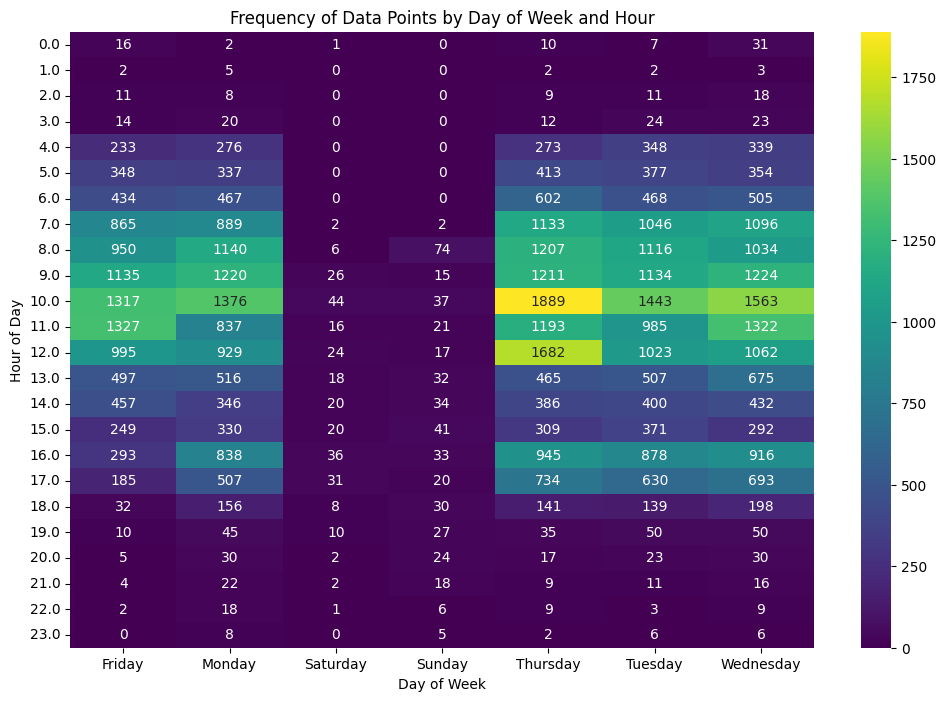

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r"D:\Kifya_training\Week 1\Technical  Content\Data\raw_analyst_ratings.csv")

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], format="%Y-%m-%d %H:%M:%S%z", errors='coerce')

# Extract date and time components
data['day_of_week'] = data['date'].dt.day_name()
data['hour'] = data['date'].dt.hour

# Print first few rows to check results
print(data[['date', 'day_of_week', 'hour']].head())

# Ensure 'day_of_week' and 'hour' columns exist
if 'day_of_week' in data.columns and 'hour' in data.columns:
    # Create a pivot table for heatmap (hour vs. day of the week)
    heatmap_data = data.pivot_table(index='hour', columns='day_of_week', aggfunc='size', fill_value=0)

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d')
    plt.title('Frequency of Data Points by Day of Week and Hour')
    plt.xlabel('Day of Week')
    plt.ylabel('Hour of Day')
    plt.show()
else:
    print("The necessary columns ('day_of_week' and/or 'hour') do not exist in the DataFrame.")


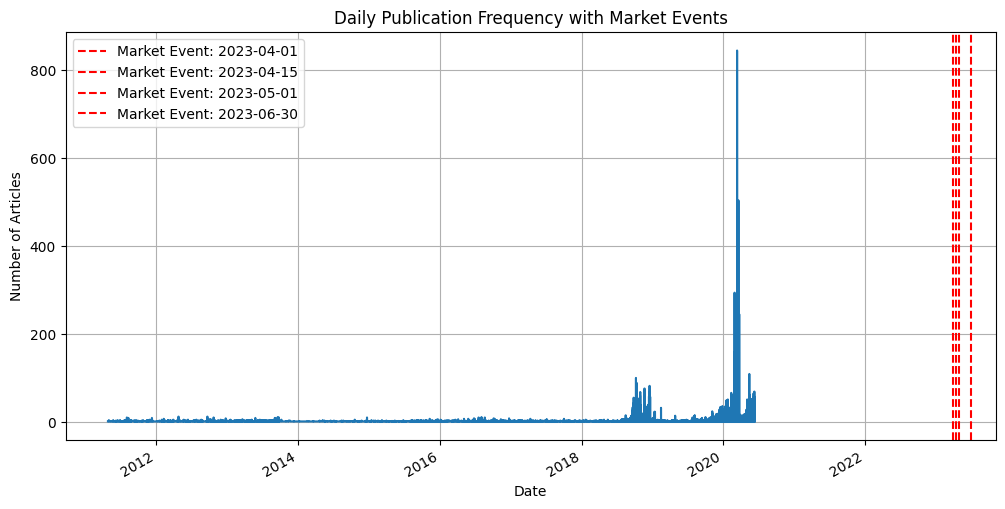

In [21]:
# Define a list of key market event dates (example dates, replace with your actual event dates)
market_events = ['2023-04-01', '2023-04-15', '2023-05-01', '2023-06-30']  # Replace with actual dates

# Convert the market events to datetime format
market_events = pd.to_datetime(market_events)

# Group by date to get daily publication frequency
daily_publication = data.groupby('date').size()

# Plot daily publication frequency
plt.figure(figsize=(12, 6))
daily_publication.plot()

# Highlight spikes related to market events
for event in market_events:
    plt.axvline(x=event, color='r', linestyle='--', label=f"Market Event: {event.date()}")

plt.title('Daily Publication Frequency with Market Events')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.grid()
plt.show()


Top 10 Publishers by Number of Articles:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


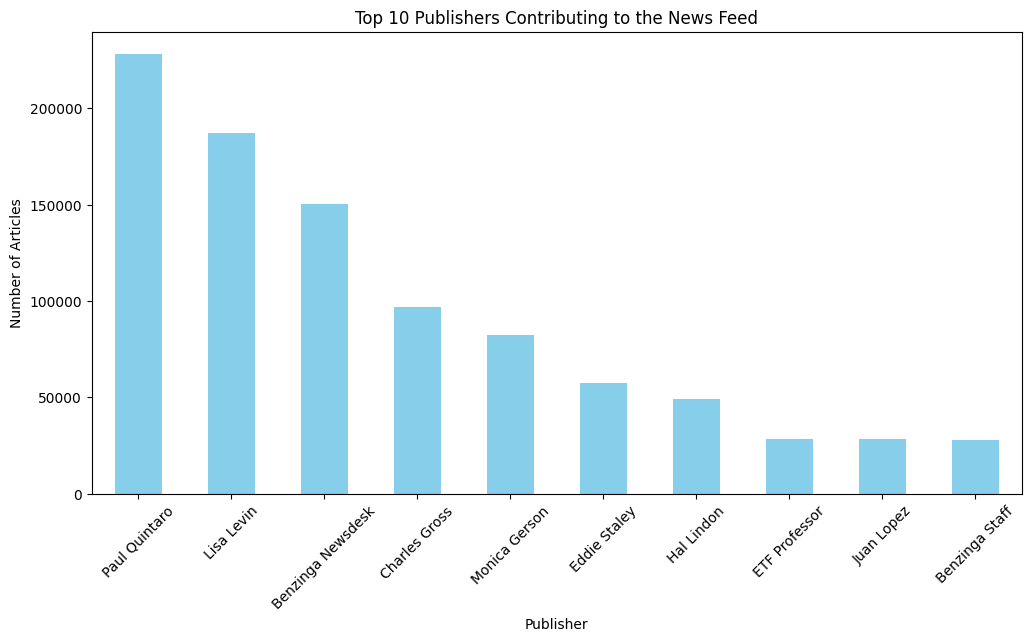

In [43]:
# Assuming 'Publisher' is the column containing the publisher's name
# Count how many articles each publisher has contributed
publisher_counts = data['publisher'].value_counts()

# Display the top publishers
top_publishers = publisher_counts.head(10)
print("Top 10 Publishers by Number of Articles:")
print(top_publishers)

# Plot the top publishers
top_publishers.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Top 10 Publishers Contributing to the News Feed')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()


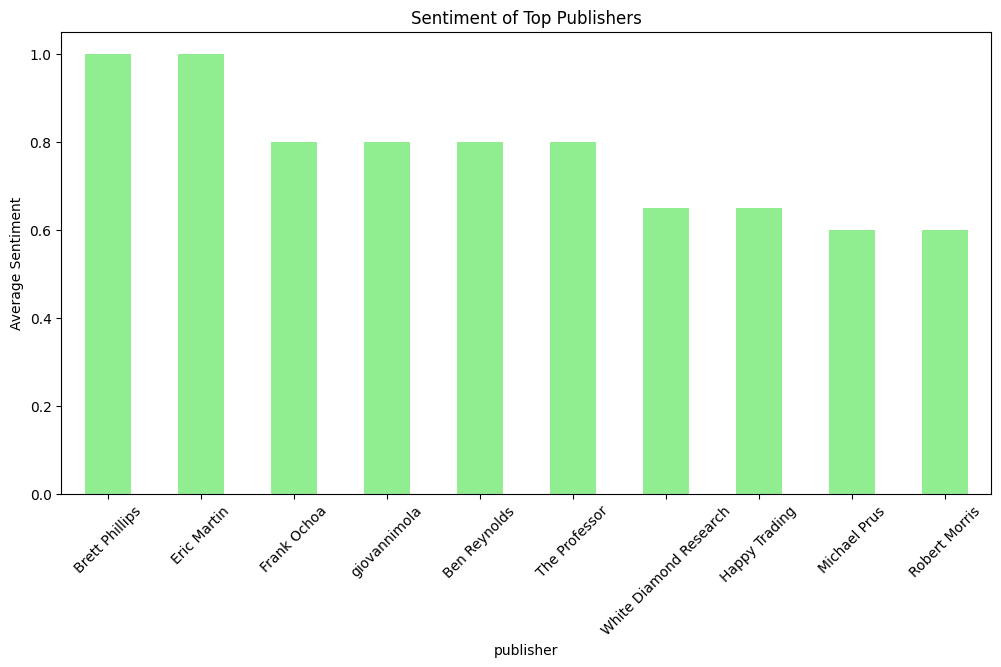

In [45]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to the 'Headline' column 
data['sentiment'] = data['headline'].apply(get_sentiment)

# Group by Publisher and calculate average sentiment
publisher_sentiment = data.groupby('publisher')['sentiment'].mean()

# Sort publishers by sentiment
sorted_publisher_sentiment = publisher_sentiment.sort_values(ascending=False).head(10)

# Plot sentiment of top publishers
sorted_publisher_sentiment.plot(kind='bar', figsize=(12, 6), color='lightgreen')
plt.title('Sentiment of Top Publishers')
plt.xlabel('publisher')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.show()


Top 10 Domains by Number of Articles:
publisher_Domain
Unknown                   1399240
benzinga.com                 7937
gmail.com                     139
andyswan.com                    5
investdiva.com                  2
tothetick.com                   2
eosdetroit.io                   1
forextraininggroup.com          1
stockmetrix.net                 1
Name: count, dtype: int64


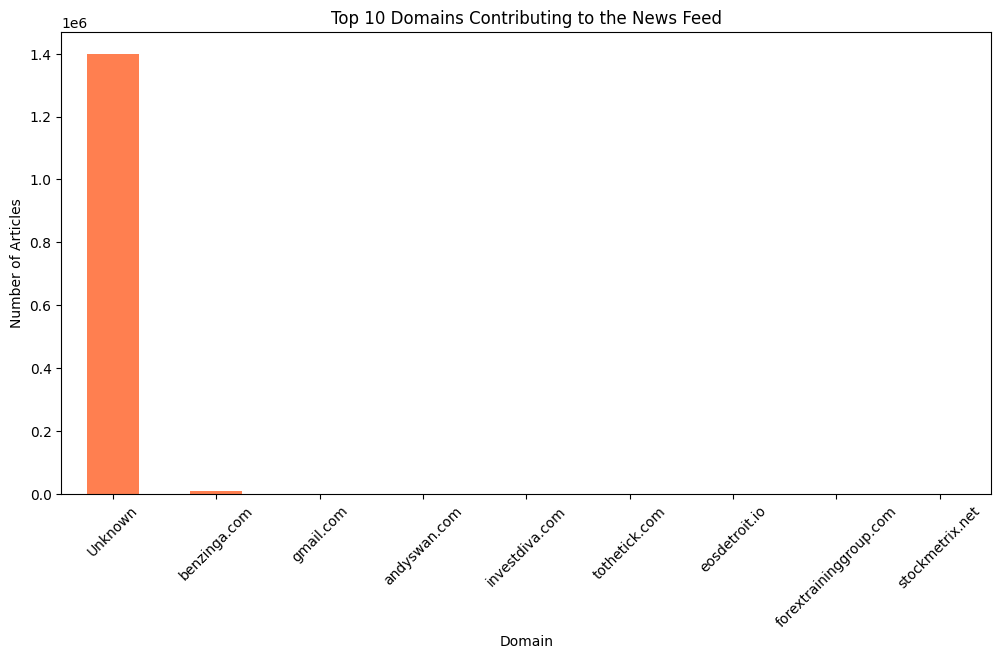

In [47]:
import re

# Function to extract domain from email
def extract_domain(email):
    match = re.search(r'@([\w.-]+)', email)
    return match.group(1) if match else 'Unknown'

# Apply the function to the 'Publisher' column
data['publisher_Domain'] = data['publisher'].apply(extract_domain)

# Count how many articles are from each domain
domain_counts = data['publisher_Domain'].value_counts()

# Display the top domains
top_domains = domain_counts.head(10)
print("Top 10 Domains by Number of Articles:")
print(top_domains)

# Plot the top domains
top_domains.plot(kind='bar', figsize=(12, 6), color='coral')
plt.title('Top 10 Domains Contributing to the News Feed')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()
